In [10]:
import numpy as np
import pandas as pd 

import os
for dirname, subdirs, _ in os.walk('/kaggle/input/intel-image-classification'):
    print(dirname)

/kaggle/input/intel-image-classification
/kaggle/input/intel-image-classification/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain
/kaggle/input/intel-image-classification/seg_train/seg_train/street
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings
/kaggle/input/intel-image-classification/seg_train/seg_train/sea
/kaggle/input/intel-image-classification/seg_train/seg_train/forest
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier
/kaggle/input/intel-image-classification/seg_pred
/kaggle/input/intel-image-classification/seg_pred/seg_pred
/kaggle/input/intel-image-classification/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test/mountain
/kaggle/input/intel-image-classification/seg_test/seg_test/street
/kaggle/input/intel-image-classification/seg_test/seg_test/buildings
/kaggle/input/i

#### The dataset consists of natural scene images across 6 categories:

**Folder hierarchy:**

    /kaggle/input/intel-image-classification
    │
    ├── seg_train/ → Training images
    │ └── seg_train/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    ├── seg_test/ → Testing images
    │ └── seg_test/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    └── seg_pred/ → Prediction images (unlabeled)
    └── seg_pred/

In [11]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [12]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

# List subdirectories (classes) in the training directory
train_subdirs = os.listdir(train_dir)
print("Training subdirectories (classes):")
for subdir in train_subdirs:
    print(subdir)

# List subdirectories (classes) in the test directory
test_subdirs = os.listdir(test_dir)
print("\nTesting subdirectories (classes):")
for subdir in test_subdirs:
    print(subdir)

Training subdirectories (classes):
mountain
street
buildings
sea
forest
glacier

Testing subdirectories (classes):
mountain
street
buildings
sea
forest
glacier


In [13]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
print(os.listdir(train_dir))

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [14]:
class_folder_forest = 'forest'

# Get list of images in chosen class folder
images_list_forest = os.listdir(os.path.join(train_dir, class_folder_forest))
print("First image file:", images_list_forest[0])

First image file: 7981.jpg


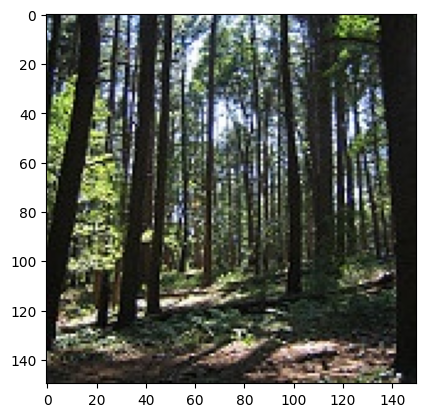

In [15]:
# Full path to the first image
image_path_forest = os.path.join(train_dir, class_folder_forest, images_list_forest[0])

# Read and display the image
image_forest1 = imread(image_path_forest)
plt.imshow(image_forest1)

In [16]:
image_forest1.shape

(150, 150, 3)

In [17]:
class_folder_sea = 'sea'

images_list_sea = os.listdir(os.path.join(train_dir, class_folder_sea))
print("First image file:", images_list_sea[0])

First image file: 19812.jpg


In [ ]:
image_path_sea = os.path.join(train_dir, class_folder_sea, images_list_sea[0])

image_sea1 = imread(image_path_sea)
plt.imshow(image_sea1)

In [ ]:
image_sea1.shape

### **Number of Images**

In [20]:
class_folder_mountain = 'mountain'
class_folder_glacier = 'glacier'
class_folder_buildings = 'buildings'
class_folder_street = 'street'

len_forest = len(images_list_forest)
len_sea = len(images_list_sea)
len_street = len(os.listdir(os.path.join(train_dir, class_folder_street)))
len_buildings = len(os.listdir(os.path.join(train_dir, class_folder_buildings)))
len_glacier = len(os.listdir(os.path.join(train_dir, class_folder_glacier)))
len_mountain = len(os.listdir(os.path.join(train_dir, class_folder_mountain)))

In [21]:
print("Glacier: ",len_glacier)
print("Sea: ",len_sea)
print("Mountain: ",len_mountain)
print("buildings: ",len_buildings)
print("Forest: ",len_forest)
print("Street: ",len_street)


Glacier:  2404
Sea:  2274
Mountain:  2512
buildings:  2191
Forest:  2271
Street:  2382


### Analyzing Image Dimensions in the "forest" Folder

In [22]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_dir, 'forest')):
    img = imread(os.path.join(test_dir, 'forest', image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


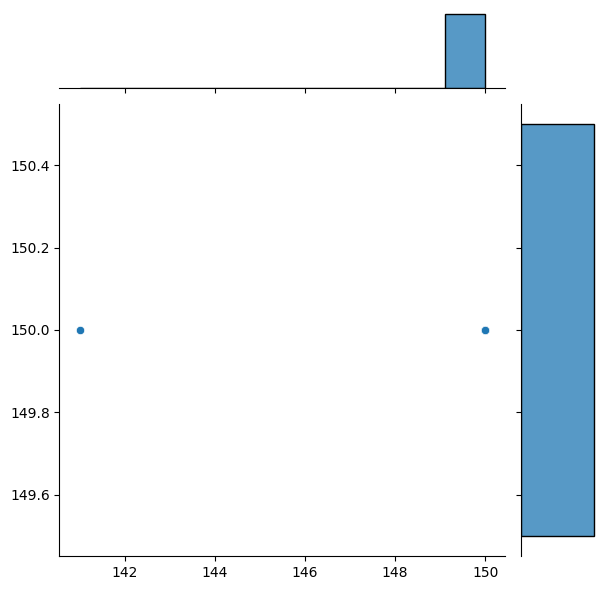

In [23]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")

In [24]:
plt.show()

#### dataset seems to be preprocessed to a fixed size (150×150).

# Preparing the Data for the model

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us.

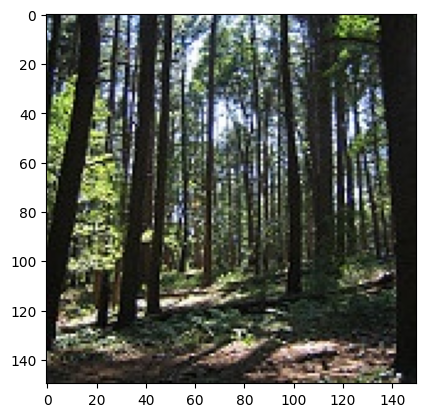

In [25]:
plt.imshow(image_forest1)

In [26]:
image_forest1.max()

255

In [27]:
image_forest1.min()

0

In [28]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

In [ ]:
plt.imshow(image_gen.random_transform(image_forest1))

In [ ]:
plt.imshow(image_gen.random_transform(image_forest1))

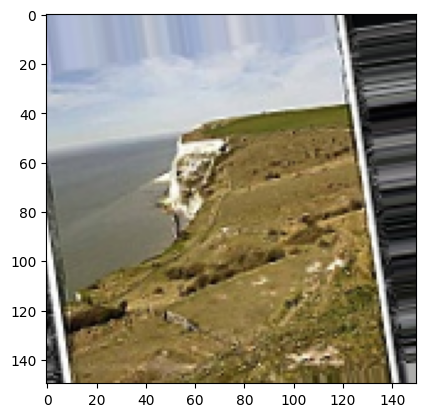

In [33]:
plt.imshow(image_gen.random_transform(image_sea1))

## Generated Manipulated iamge from a directory

In [34]:
train_generator = image_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"    # 6 classes
)

Found 14034 images belonging to 6 classes.


In [35]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [36]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

Found 3000 images belonging to 6 classes.


# Creating the Model